# Portuguese wine

### Research questions
<ol>
<li> Is there a correlation between the chemical properties of wine and the perceived rating. Can we (accurately) predict the amount of points given when only taking into account the chemical properties?</li>
<li> To what extend does the soil on which the grapes are grown have an influence on the different chemical aspects of a given wine?</li>
</ol>


### Contents:
- Import Necessary Libraries  
- Read In and Explore the Data  
- Data Analysis/Cleaning Data  
- Data Visualization  
- Choosing the Best Model  

#### 1) Import Necessary Libraries
To start off, the necessary libraries are imported such as numpy, pandas, matplotlib, holoviews, panel and seaborn.

In [1]:
#data analysis:
import pandas as pd
import numpy as np

#visualisation:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import itertools

#### 2) Read in and Explore the Data
Here we explore the data from the csv file

In [2]:
# Read the redwine.csv file into a Pandas dataframe
df = pd.read_csv('redwine.csv',index_col = 0,sep=';',encoding ='ISO-8859-1')
df.columns = [c.replace(' ', '_') for c in df.columns]

# Sample 5 random rows of the dataframe
df.sample(5)

,country,description,designation,points,price,province,taster_name,title,variety,winery,...,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
1593,Portugal,This wine swings between structure and ripe fr...,Palha Canas,88,12.0,Lisboa,Lauren Buzzeo,Casa Santos Lima 2011 Palha Canas Red (Lisboa),Portuguese Red,Casa Santos Lima,...,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8
682,Portugal,"Tough, tannic and still young, this is a power...",Somontes Reserva,91,19.0,Dão,Matt Kettmann,Casa da Passarella 2011 Somontes Reserva Red (...,Portuguese Red,Casa da Passarella,...,0.61,0.3,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2
1382,Portugal,"This smooth ripe wine is ready to drink, Its b...",NaN,89,15.0,Alentejano,Lauren Buzzeo,Dona Maria-Júlio Bastos 2014 Red (Alentejano),Portuguese Red,Dona Maria-Júlio Bastos,...,0.39,0.69,2.8,0.095,17.0,35.0,0.9994,3.10,0.61,10.8
597,Portugal,"Here is a solid, while also elegant, wine, It ...",Reserva,90,20.0,Tejo,Michael Schachner,Terra Silvestre 2010 Reserva Red (Tejo),Portuguese Red,Terra Silvestre,...,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
509,Portugal,"This is a ripe and warm wine, with generous fr...",Reserva do Monte,88,15.0,Lisboa,Michael Schachner,Casa Santos Lima 2014 Reserva do Monte Red (Li...,Portuguese Red,Casa Santos Lima,...,0.44,0.49,2.4,0.078,26.0,121.0,0.9978,3.23,0.58,9.2


#### Column types:


In [3]:
# Show all columns of the data set
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'taster_name', 'title', 'variety', 'winery', 'fixed_acidity',
       'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

To make this data more visible we put the column names in a csv file with the column type and data type


In [4]:
pd.read_csv('column_types.csv',sep=';')

,Column name,Column type,Actual value type,Desired value types,Dependency,Level of measurement
0,country,Categorical,String,String,Independent,Nominal
1,description,Alphanumerical,String,String,Independent,Nominal
2,designation,Categorical,String,String,Independent,Nominal
3,points,Numerical,Int,Int,Dependent,Interval
4,price,Numerical,Float,Float,Dependent,Ratio
5,province,Categorical,String,String,Independent,Nominal
6,taster_name,Alphanumerical,String,String,Independent,Nominal
7,title,Alphanumerical,String,String,Independent,Nominal
8,variety,Categorical,String,String,Dependent,Nominal
9,winery,Categorical,String,String,Dependent,Nominal


#### Description 

Here we describe different column names

- Country: In which country the wine was made.
- Description: Information about the wine.
- Points: How the wine was rated.
- Price: How expensive each bottle was.
- Province: In which province the wine was made.
- Taster name: The name of the person who tested this wine.
- Title: The name of the wine.
- Variety: Type of wine (Portuguese red)
- Winery: Name of the winery where the wine was made.
- Fixed acidity: Used to estimate how sour a wine will probably taste like.
- Volatile acidity: Volatile acidity is a measure of the low molecular weight fatty acids in wine.
- Citric acid: Measure of citric acid concentrations in wine.
- Residual sugar: How much sugar is left after fermentation.
- Chlorides: Concentrations of chloride, a toxic chemical which also determines how salty the wine will taste.
- Free sulfur dioxide: Concentrations of free sulfur dioxide.
- Total sulfur dioxide: Total concentrations of sulfur dioxide including free sulfur dioxide and sulfur dioxide which has binded to other chemicals.
- Density: The weight of the wine divided by the volume of the wine.
- pH: The acidity level of the wine.
- Sulphates: Sulphate concentrations in the wine.
- Alcohol: Volumepercentage of alcohol in the wine.

The categories whose actual datatype does not match our required datatypes are listed as follows:

- citric acid is given as strings representing floats between 0 and 1

##### Outliers:
The outliers are calculated as 3 times the std above the mean value from a column.  
As we can see in the sample below, there are 20 red wines with a exceptionally high price.

In [5]:
df.describe()

,points,price,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates
count,2465.000000,2196.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,88.811359,24.819217,8.352819,0.528162,2.562353,0.087485,15.804665,47.218661,3.311201,0.660353
std,2.974000,25.539475,1.734847,0.178869,1.407030,0.047043,10.379218,33.187830,0.153927,0.172531
min,81.000000,5.000000,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,87.000000,12.000000,7.100000,0.400000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000
50%,88.000000,17.000000,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,91.000000,28.000000,9.300000,0.635000,2.600000,0.091000,21.000000,64.000000,3.400000,0.730000
max,100.000000,450.000000,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


In [6]:
# Check all empty/missing values
df.isnull().sum()

country                   0
description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
variety                   0
winery                    0
fixed_acidity             0
volatile_acidity          0
citric_acid               0
residual_sugar            0
chlorides                 0
free_sulfur_dioxide       0
total_sulfur_dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

In [7]:
# Outliers from price:
price_col = df['price']
outliers = df[price_col > price_col.mean() + 3 * price_col.std()]
outliers

,country,description,designation,points,price,province,taster_name,title,variety,winery,...,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
15,Portugal,This is a major Douro wine from the Poças fami...,Símbolo,94,150.0,Douro,Matt Kettmann,Poças 2014 Símbolo Red (Douro),Portuguese Red,Poças,...,0.360,0.34,1.8,0.075,18.0,38.0,0.9933,3.38,0.88,13.6
279,Portugal,"One of the iconic wines of Portugal, the brand...",Pêra-Manca,94,275.0,Alentejo,Michael Schachner,Cartuxa 2011 Pêra-Manca Red (Alentejo),Portuguese Red,Cartuxa,...,0.815,0.02,2.7,0.072,17.0,34.0,0.9955,3.58,0.89,12.3
296,Portugal,This top wine from Quinta Vale Dona Maria come...,Vinha do Rio,95,150.0,Douro,Jim Gordon,Quinta Vale Dona Maria 2012 Vinha do Rio Red (...,Portuguese Red,Quinta Vale Dona Maria,...,0.330,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1
356,Portugal,Produced from selected parcels of fruit in top...,Reserva,92,110.0,Alentejano,Virginie Boone,Cortes de Cima 2012 Reserva Red (Alentejano),Portuguese Red,Cortes de Cima,...,0.340,0.27,2.8,0.067,8.0,44.0,0.99384,3.21,0.56,12
530,Portugal,"Named after family members called Maria, this ...",Marias da Malhadinha,92,158.0,Alentejano,Sean P. Sullivan,Herdade da Malhadinha Nova 2007 Marias da Malh...,Portuguese Red,Herdade da Malhadinha Nova,...,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5
618,Portugal,Named after the tower that dominates the build...,Torre do Esporão Garrafeira,95,180.0,Alentejo,Sean P. Sullivan,Herdade do Esporão 2011 Torre do Esporão Garra...,Portuguese Red,Herdade do Esporão,...,0.660,-,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8
818,Portugal,Made from a field blend of old vines to which ...,Referência Grand Reserva,94,110.0,Douro,Paul Gregutt,Quinta Nova de Nossa Senhora do Carmo 2013 Ref...,Portuguese Red,Quinta Nova de Nossa Senhora do Carmo,...,0.330,0.49,3.4,0.093,54.0,80.0,10.002,3.30,0.76,10.7
833,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,Michael Schachner,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,...,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1
897,Portugal,Produced from old vines on the schist slopes o...,Unico,95,120.0,Douro,Jim Gordon,Conceito Vinhos 2015 Unico Red (Douro),Portuguese Red,Conceito Vinhos,...,0.360,0.32,1.8,0.067,4.0,8.0,0.9928,3.36,0.55,12.8


In [8]:
# Here we drop the wines from the dataframe with a higher value of chloride than legally allowed in Australia.
# In other countries the maximum value varies "When wine contains excess sodium (excess sodium is equal to the content of
# sodium ions less the content of chloride ions expressed as sodium), it is generally
# less than 60 mg/L, a limit which may be exceeded in exceptional cases." - https://www.oiv.int/public/medias/2604/oiv-ma-d1-03.pdf
df.drop(df[df.chlorides < 0.606].index)

,country,description,designation,points,price,province,taster_name,title,variety,winery,...,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
434,Portugal,This wine has tannins and a solid structure th...,NaN,86,27.0,Douro,Roger Voss,Quinta do Pessegueiro 2012 Red (Douro),Portuguese Red,Quinta do Pessegueiro,...,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4
1948,Portugal,The huge concentration of this wine reflects t...,Marquès de Borba Reserva,87,NaN,Alentejo,Jim Gordon,"J, Portugal Ramos 2003 Marquès de Borba Reserv...",Portuguese Red,"J, Portugal Ramos",...,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4
2311,Portugal,"Bigode, the mustache, is a soft and juicy wine...",Bigode,83,8.0,Lisboa,Roger Voss,DFJ Vinhos 2010 Bigode Red (Lisboa),Portuguese Red,DFJ Vinhos,...,0.52,1,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4


##### Some observations:  
- The minimal score is 81 on a scale of 100, which means they all are recommended and might be biased.
- Most density values are between 0 and 1, except for some, which need to be changed.
- Some values from alcohol have the wrong format, for example "100.333.333.333".
- As goes for citric acidity, this is the wrong type, it needs to be float.
- The wines with id's: 434, 1948 and 2311 exceed the maximum legal level of chloride (>606mg/L).

#### 3) Data Analysis/Cleaning Data
Here we look at how complete and clean the data is.




In [9]:
df.describe(include = [object])

,country,description,designation,province,taster_name,title,variety,winery,citric_acid,density,alcohol
count,2465,2465,2312,2465,2465,2465,2465,2465,2465,2465,2465
unique,1,2281,1161,30,18,2268,1,310,80,428,61
top,Portugal,The Estremoz region in Alentejo is at the hear...,Reserva,Douro,Roger Voss,Herdade da Comporta 2012 Red (Península de Set...,Portuguese Red,Wines & Winemakers,-,0.9976,9.5
freq,2465,2,171,880,630,3,2465,84,203,59,234


In [10]:
df.describe(exclude = [object])

,points,price,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates
count,2465.000000,2196.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,88.811359,24.819217,8.352819,0.528162,2.562353,0.087485,15.804665,47.218661,3.311201,0.660353
std,2.974000,25.539475,1.734847,0.178869,1.407030,0.047043,10.379218,33.187830,0.153927,0.172531
min,81.000000,5.000000,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,87.000000,12.000000,7.100000,0.400000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000
50%,88.000000,17.000000,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,91.000000,28.000000,9.300000,0.635000,2.600000,0.091000,21.000000,64.000000,3.400000,0.730000
max,100.000000,450.000000,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


Here we can see the alcohol feature type being string, this is however not very usable. To be able to properly use the alcohol feature we will convert it to float.

##### (Missing) Value correction

This section changes the value types of **Alcohol**, **Density** and **Citric acid** to useable and readable values.

- **Alcohol**:  
    As can be seen below, there are a few values who's string representation are way larger than the rest of the values.
    These numbers seem to represent floats with repeating digits, so the best plan of action would be to remove the full stops
    and then add a decimal separator in the correct position to make it a valid alcohol percentage.
    Seeing as the normal alcohol percentage ranges from ~9 to ~11, it would make sense to add a decimal separator after first digit
    if the first digit is not a "1", because that would mean it is less than 10. If the first digit is a "1" then it is supposed to
    be a number above 10, so then we put the decimal separator after the second digit. <br /><br />
- **Density**:  
    All of the correct values are strings representing floats in the range of ~0.9 and ~1.1. Some of the strings seem to represent floats above 10.0. We will assume that these are meant to represent floats in the correct range, but just with their decimal separator in the incorrect spot. For this reason we will change the strings by moving the decimal separator to after the first digit. The strings that seem to represent no float will be converted to NaN values.<br /><br />
- **Citric acid**:  
    The same method for cleaning the density is used for cleaning the citric acid data.

In [11]:
# Prints the values of the alcohol column based on their length as strings
print(df.sort_values(by="alcohol", key=lambda x: x.str.len(), ascending=False).head(15)['alcohol'].to_string())

id
1621    11.066.666.666.666.600
1796    11.066.666.666.666.600
1765       100.333.333.333.333
1671       956.666.666.666.667
1346       100.333.333.333.333
1345       100.333.333.333.333
1767       923.333.333.333.333
1766       100.333.333.333.333
1795       956.666.666.666.667
2029       923.333.333.333.333
678                      10.55
1170                     11.95
140                      10.55
2252                     10.75
1286                     10.75


In [12]:
# Prints the values of the density
df['density'].value_counts().sort_index()

# here we can see that the first value is " . ". Values like these cannot be converted to numbers, so NaN values will be used
# a lot of these last values are way too big for density values. 
# these should be around 1.0, so the decimal separators will be placed after the first digit.

 .         1
0.99007    2
0.9902     1
0.99064    4
0.9908     1
          ..
100.025    1
100.242    2
100.289    2
100.315    6
100.369    3
Name: density, Length: 428, dtype: int64

In [13]:
# Print values of citric_acid
df['citric_acid'].value_counts().sort_index()

# here we can see that the first value is " - " and we will replace this in the next part
# also these values are strings and we convert these to floats

 -       203
0.01      47
0.02      76
0.03      41
0.04      49
        ... 
0.75       2
0.76       6
0.78       2
0.79       2
1          1
Name: citric_acid, Length: 80, dtype: int64

In [14]:
# Takes a number as string, removes unnecessary full stops, and adds a decimal separator to the number
def formatalcohol(s):
    s = s.replace('.', '')
    if s[0] == '1':
        s = s[:2] + '.' + s[2:]
    else:
        s = s[:1] + '.' + s[1:]
    return float(s)

# Takes a number as string and places comma at right position
def format_dens_cacid(s):
    try:
        # Convert all values to floats
        s = s.replace('.', '')
        s = s[:1] + '.' + s[1:]
        s = float(s)
    except Exception:
        # If value is not a number then make it a NaN
        s = np.nan
    return s

# Apply the function formatalcohol to each string
df['alcohol'] = df['alcohol'].apply(formatalcohol)

# Apply the function format_dens_cacid to each string
df['density'] = df['density'].apply(format_dens_cacid)

# Apply the function format_dens_cacid to each string
df['citric_acid'] = df['citric_acid'].apply(format_dens_cacid)

df[['alcohol','density','citric_acid']].describe()

,alcohol,density,citric_acid
count,2465.000000,2464.000000,2262.000000
mean,10.411792,0.996824,0.299425
std,1.050762,0.001870,0.185354
min,8.500000,0.990070,0.010000
25%,9.500000,0.995688,0.140000
50%,10.200000,0.996800,0.290000
75%,11.100000,0.997900,0.447500
max,14.900000,1.003690,1.000000


- Here we can see that there are no more alcohol values above 14.9 percent and that the values are converted to floats.
- Also we see that there are no more NaN values of density and that they are converted from string to float
- Last but not least, we do not have any more string or empty values in citric_acid.

#### Year extraction from title

Here we extract the numbers from the title and check if this number is a year, we also checked if the amount of wines with a year number in the title is usable.

In [15]:
def digitstoint(ns):
    return int("".join([str(n) for n in ns]))

usableyears = 0

def sep_name_year(name):
    if any([x.isdigit() for x in name]):
        global usableyears
        
        year = digitstoint([int(s) for s in name if s.isdigit()])
        if year<10000:
            usableyears += 1
            return year
        else:
            return np.nan
    else:
        
        return np.nan


df['year'] = df.title.copy()
df['year'] = df['year'].map(sep_name_year)

print(f"There are {usableyears} usable years of the {len(df['title'])} wines")

There are 2425 usable years of the 2465 wines


#### 4) Data visualisation

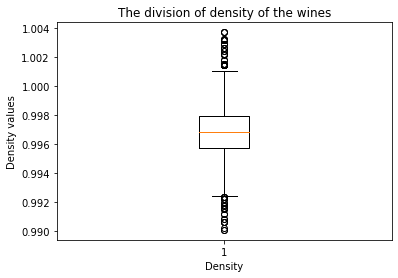

In [16]:
# Visualisation of the outliers of column "density"
plt.boxplot(df['density'].dropna())
plt.xlabel('Density')
plt.ylabel('Density values')
plt.title('The division of density of the wines')
plt.show()

<AxesSubplot:title={'center':'Amount of wines per province'}, xlabel='Provinces', ylabel='Frequency'>

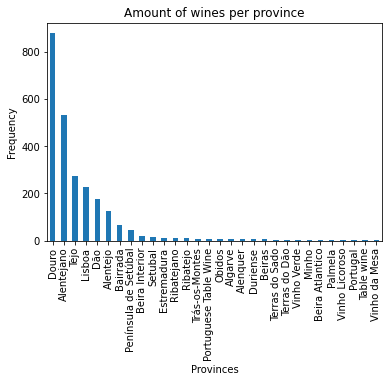

In [17]:
plt.title('Amount of wines per province')
plt.ylabel('Frequency')
plt.xlabel('Provinces')
df.province.value_counts().plot.bar()

In [18]:
plt.title('Amount of wines per alcoholic percentage')
plt.xlabel('Percentage of alcohol')
plt.ylabel('Frequency')
df.alcohol.plot.hist()

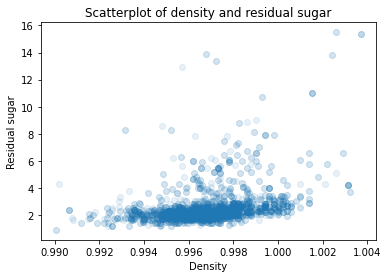

In [19]:
#df.plot.scatter(x='density',y='residual_sugar', c='DarkBlue')
plt.title('Scatterplot of density and residual sugar')
plt.xlabel('Density')
plt.ylabel('Residual sugar')
plt.scatter(df['density'],df['residual_sugar'], alpha=0.1)


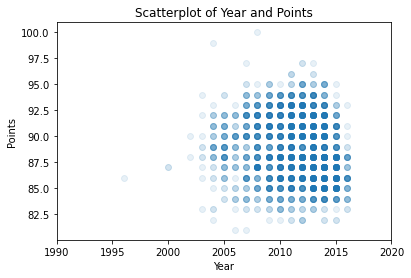

In [20]:
plt.title('Scatterplot of Year and Points')
plt.xlabel('Year')
plt.xlim((1990, 2020))
plt.ylabel('Points')
plt.scatter(df['year'],df['points'], alpha=0.1)

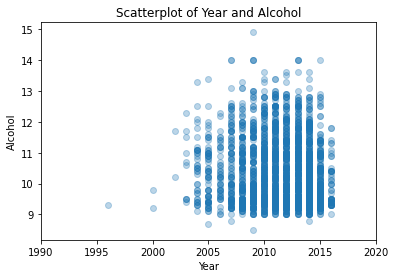

In [21]:
plt.title('Scatterplot of Year and Alcohol')
plt.xlabel('Year')
plt.xlim((1990, 2020))
plt.ylabel('Alcohol')
plt.scatter(df['year'],df['alcohol'], alpha=0.3)

When we look at the right side of the graph below we can see that when the concentration chlorides rises the average amount of points falls. We can also see in this graph that there are no wines with more than 

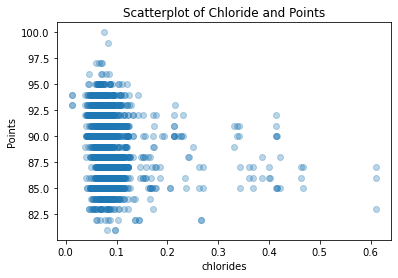

In [22]:
plt.title('Scatterplot of Chloride and Points')
plt.xlabel('chlorides')
plt.ylabel('Points')
plt.scatter(df['chlorides'],df['points'], alpha=0.3)

##### Linear regressie

Here we are going to use Linear regression on the values Density and Residual Sugar.

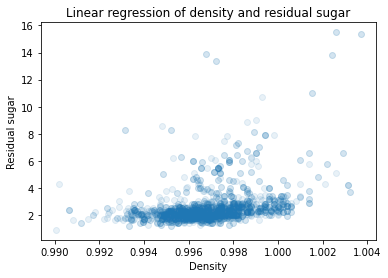

In [23]:
#df.plot.scatter(x='density',y='residual_sugar', c='DarkBlue')
df_tmp = df.copy()
df_tmp.dropna(inplace=True)
plt.title('Linear regression of density and residual sugar')
plt.xlabel('Density')
plt.ylabel('Residual sugar')
plt.scatter(df_tmp['density'],df_tmp['residual_sugar'], alpha=0.1)

x = df_tmp['density'].values.reshape(-1, 1)
y = df_tmp['residual_sugar'].values
z = df_tmp['alcohol'].values

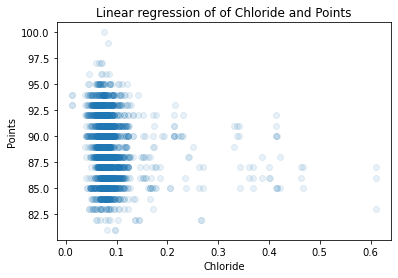

In [24]:
#df.plot.scatter(x='density',y='residual_sugar', c='DarkBlue')
plt.title('Linear regression of of Chloride and Points')
plt.xlabel('Chloride')
plt.ylabel('Points')
plt.scatter(df['chlorides'],df['points'], alpha=0.1)

<AxesSubplot:ylabel='Frequency'>

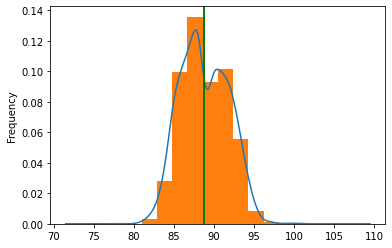

In [25]:
# This looks like a Gaussian distribution

df["points"].plot.kde()
plt.axvline(df["points"].mean(), color='g', linewidth=2)
df["points"].plot.hist(density=True)


#### 5) Choosing the Best Model

Researching if there is a correlation between the chemical propperties in a wine and the points it is given.

points                  1.000000
price                   0.586486
fixed_acidity           0.090071
volatile_acidity       -0.341131
citric_acid             0.185946
residual_sugar         -0.002561
chlorides              -0.132438
free_sulfur_dioxide    -0.059912
total_sulfur_dioxide   -0.198235
density                -0.196166
pH                     -0.021553
sulphates               0.205161
alcohol                 0.472012
year                   -0.128758
Name: points, dtype: float64


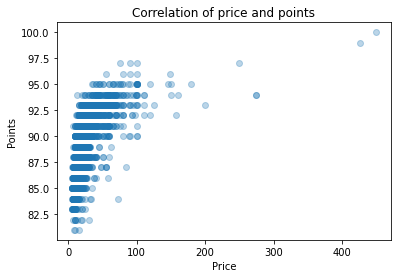

In [26]:
print(df.corr()['points'])
plt.title('Correlation of price and points')
plt.xlabel('Price')
plt.ylabel('Points')
plt.scatter(df.price, df.points, alpha=0.3)
plt.show()

In [27]:
# Here we drop all the values that are not chemical properties
X = df_tmp.drop(['points','country','description','designation','price','province','taster_name','title','variety','winery','density'],axis=1)
y = df_tmp['points']

# Making test and train set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 0)

# Starting learning process
lr = LinearRegression()
lr.fit(X_train,y_train)

y1 = lr.intercept_+lr.coef_[0]*x
print('a = {:.0f}, b = {:.0f}'.format(lr.intercept_, lr.coef_[0]))

a = 261, b = 0


In [28]:
# Here we test our Model with the RMSE method

predmpg = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test,predmpg))

2.4410036116846103

Now we try every possible combination of features and check wich one has the lowest RMSE value. These features will be used for the linear regression model.

In [29]:
# This script tests all possible combination of features 
# to check which combination give the highest score for the linear regression
y = df_tmp['points']
# List of features we want to use
features  = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']
#Make list of all combinations of features
possible_combinations = [np.asarray(subset) for l in range(1,len(features)+1) \
                             for subset in itertools.combinations(features,l) ]

best_RMSE = 50.00
best_comb = possible_combinations[0]
y1 = 0
for comb in possible_combinations:
    X = df_tmp[comb]
    # Making test and train set
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 0)

    # Starting learning process
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    y1 = lr.intercept_+lr.coef_[0]*x
    predmpg = lr.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,predmpg))

    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_comb = comb

print(best_comb)
print(best_RMSE)


['fixed_acidity' 'citric_acid' 'residual_sugar' 'chlorides'
 'total_sulfur_dioxide' 'density' 'sulphates' 'alcohol']
2.429999746434494


In [30]:
# Using best combination of features
X = df_tmp[best_comb]
# Making test and train set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 0)
# Starting learning process
lr = LinearRegression()
lr.fit(X_train,y_train)
# Check score to
lr.score(X,y)

0.2909537517324332

##### Conclusion 
Is there a correlation between the chemical properties of wine and the perceived rating. Can we (accurately) predict the amount of points given when only taking into account the chemical properties?

This answer would be no because only 30.76% are predicted successfully.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e9b27b8-a34d-4e11-8ef1-1fdc6f91d699' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>